# 机器学习简述

迫于姚红琳师姐的要求。。。来班门弄斧给大家讲讲机器学习。。。

## 1、机器学习是用来干啥的？

机器学习可以算是一门基于已有经验的预测科学。给定某些已知特征，然后用来预测一些未知目标。
    
    举几个栗子：
    
    傍晚小街路面上沁出微雨后的湿润，和熙的细风吹来，抬头看看天边的晚霞，嗯，明天又是一个好天气。走到水果摊旁，挑了个根蒂蜷缩、敲起来声音浊响的青绿西瓜，一边满心期待着皮薄肉厚瓢甜的爽落感，一边愉快地想着，这学期狠下了工夫，基础概念弄得清清楚楚，算法作业也是信手拈来，这门课成绩一定差不了！哈哈，也希望自己这学期的machine learning课程取得一个好成绩！
    
    ——摘自周志华《机器学习》
   
正如我们根据过去的经验来判断明天的天气，吃货们希望从购买经验中挑选一个好瓜；基于学霸们的学习经验，学渣们希望能预测自己期末是否能不挂科；那能不能让计算机帮助人类来实现这些个预测呢？机器学习正是这样的一门学科，人的“经验”对应计算机中的“数据”，让计算机来学习这些经验数据，生成一个算法模型，在面对新的情况中，计算机便能作出有效的判断，这便是机器学习。

## 2、机器学习的主要手段：

（1）有监督的学习：

    分类： Naive Bayes, 支持向量机SVM, 决策树，集成分类器, 神经网络, Gaussian Process
    回归：最小二乘回归，Lasso/Ridge回归, 逻辑回归, SVR, 神经网络, Gaussian Process

（2）无监督的学习：

    聚类：k-means聚类，DBSCAN，混合高斯聚类, 谱聚类等
    降维: PCA, LDA, t-SNE

（3）模型参数寻优

## 3、有监督的学习实例：基于SVM的手写数字集Mnist识别

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.98      1.00      0.99        48
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        45
           4       1.00      1.00      1.00        39
           5       0.98      0.98      0.98        45
           6       0.98      0.98      0.98        49
           7       0.98      1.00      0.99        49
           8       0.97      0.97      0.97        32
           9       1.00      0.95      0.98        44

   micro avg       0.99      0.99      0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99 

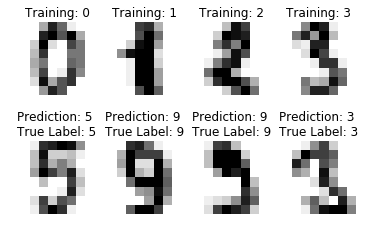

In [4]:
from IPython.utils import io
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# 数据导入， 绘图展示
digits = datasets.load_digits()
images_and_labels = list(zip(digits.images, digits.target))
with io.capture_output() as captured:
    for index, (image, label) in enumerate(images_and_labels[:4]):
        plt.subplot(2, 4, index + 1)
        plt.axis('off')
        plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('Training: %i' % label)
##############################################################################################
# 以上均不重要

# 数据预处理，划分训练集，测试集
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
train_x, test_x, train_y, test_y = train_test_split(data, digits.target)

# 使用SVM模型, 设置参数, 使用训练集训练模型
classifier = svm.SVC(gamma=0.001)
classifier.fit(train_x, train_y)

# 使用模型预测新数据
predicted_y = classifier.predict(test_x)

# 模型评估
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(test_y, predicted_y)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(test_y, predicted_y))

# 以下均不重要
###########################################################################################

images_and_predictions = list(zip(test_x, predicted_y, test_y))
with io.capture_output() as captured:
    for index, (image, prediction, true_label) in enumerate(images_and_predictions[:4]):
        plt.subplot(2, 4, index + 5)
        plt.axis('off')
        plt.imshow(image.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('Prediction: {} \nTrue Label: {}'.format(prediction, true_label))

plt.show()

效果太强了。。。很多数字说实话我自己都看不能看出结果。。。

## 4、无监督的（深度）学习：生成对抗网络（GAN）

（内心OS：啥是深度学习？？？）

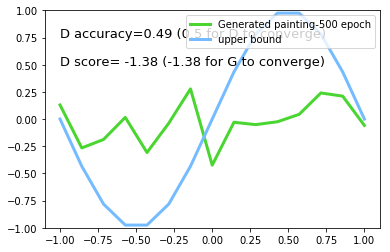

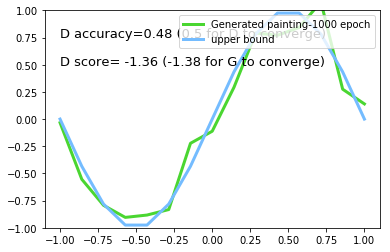

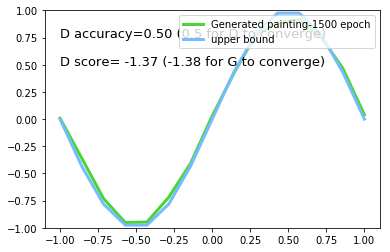

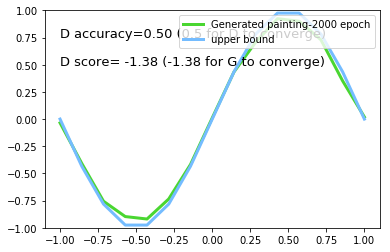

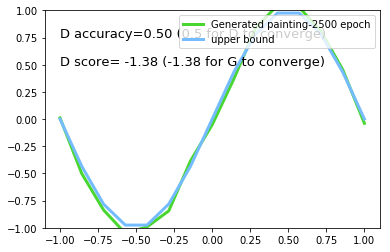

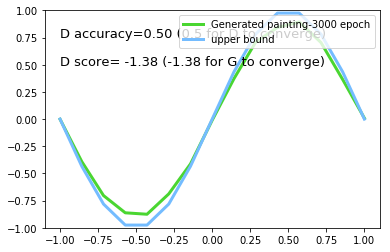

In [10]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# torch.manual_seed(1)       # reproducible
# np.random.seed(1)

# Hyper Parameters
BATCH_SIZE = 64
LR_G = 0.0001       # learning rate for generator
LR_D = 0.0001       # learning rate for discriminator
N_IDEAS = 5         # think of this as number of ideas for generating an art work(Generator)
ART_COMPONENTS = 15 # it could be total point G can drew in the canvas
PAINT_POINTS = np.vstack([np.linspace(-1, 1, ART_COMPONENTS) for _ in range(BATCH_SIZE)])


def artist_works():    # painting from the famous artist (real target)
    #a = np.random.uniform(1, 2, size=BATCH_SIZE)[:, np.newaxis]
    r = 0.02 * np.random.randn(1, ART_COMPONENTS)
    paintings = np.sin(PAINT_POINTS * np.pi) + r
    paintings = torch.from_numpy(paintings).float()
    return paintings


G = nn.Sequential(                  # Generator
    nn.Linear(N_IDEAS, 128),        # random ideas (could from normal distribution)
    nn.ReLU(),
    nn.Linear(128, ART_COMPONENTS), # making a painting from these random ideas
)

D = nn.Sequential(                  # Discriminator
    nn.Linear(ART_COMPONENTS, 128), # receive art work either from the famous artist or a newbie like G
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid(),                   # tell the probability that the art work is made by artist
)


opt_D = torch.optim.Adam(D.parameters(), lr=LR_D)
opt_G = torch.optim.Adam(G.parameters(), lr=LR_G)

plt.ion()    # something about continuous plotting

D_loss_history = []
G_loss_history = []
for step in range(3000):
    artist_paintings = artist_works()          # real painting from artist
    G_ideas = torch.randn(BATCH_SIZE, N_IDEAS) # random ideas
    G_paintings = G(G_ideas)                   # fake painting from G (random ideas)
    
    prob_artist0 = D(artist_paintings)         # D try to increase this prob
    prob_artist1 = D(G_paintings)              # D try to reduce this prob
    
    D_loss = - torch.mean(torch.log(prob_artist0) + torch.log(1. - prob_artist1))
    G_loss = torch.mean(torch.log(1. - prob_artist1))
    
    D_loss_history.append(D_loss)
    G_loss_history.append(G_loss)
    
    opt_D.zero_grad()
    D_loss.backward(retain_graph=True)    # reusing computational graph
    opt_D.step()
    
    opt_G.zero_grad()
    G_loss.backward()
    opt_G.step()
    
    if step % 500 == 0:  # plotting
        plt.cla()
        plt.plot(PAINT_POINTS[0], G_paintings.data.numpy()[0], c='#4AD631', lw=3, label='Generated painting-'+str(step+500)+' epoch',)
        plt.plot(PAINT_POINTS[0], np.sin(PAINT_POINTS[0] * np.pi), c='#74BCFF', lw=3, label='upper bound')
        plt.text(-1, 0.75, 'D accuracy=%.2f (0.5 for D to converge)' % prob_artist0.data.numpy().mean(), fontdict={'size': 13})
        plt.text(-1, 0.5, 'D score= %.2f (-1.38 for G to converge)' % -D_loss.data.numpy(), fontdict={'size': 13})
        plt.ylim((-1, 1));plt.legend(loc='upper right', fontsize=10);plt.draw();plt.pause(0.01)

plt.ioff()
plt.show()

## 5、到底啥是深度学习？
深度学习是用于建立、模拟人脑进行分析学习的神经网络，并模仿人脑的机制来解释数据的一种机器学习技术。它的基本特点是试图模仿大脑的神经元之间传递，处理信息的模式。最显著的应用是计算机视觉和自然语言处理(NLP)领域。显然，“深度学习”是与机器学习中的“神经网络”是强相关。

1.4.1
1 image: 18485 ; Sneaker


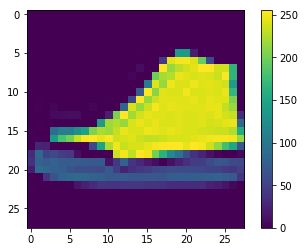

2 image: 18264 ; Sandal


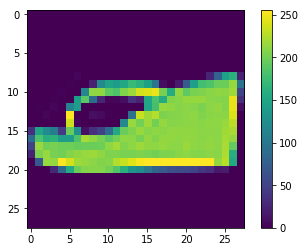

3 image: 6143 ; Sandal


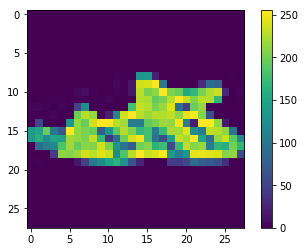

4 image: 31653 ; Trouser


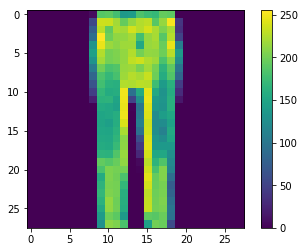

5 image: 5463 ; Shirt


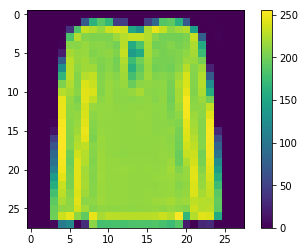

In [50]:
from __future__ import absolute_import, division, print_function, unicode_literals

# 导入TensorFlow和tf.keras
import tensorflow as tf
import keras

# 导入辅助库
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

import random
for i in range(5):
    plt.figure()
    n=random.randint(0,60000)
    plt.imshow(train_images[n])
    plt.colorbar()
    plt.grid(False)
    print(i+1,"image:",n,';',class_names[train_labels[n]])
    plt.show()

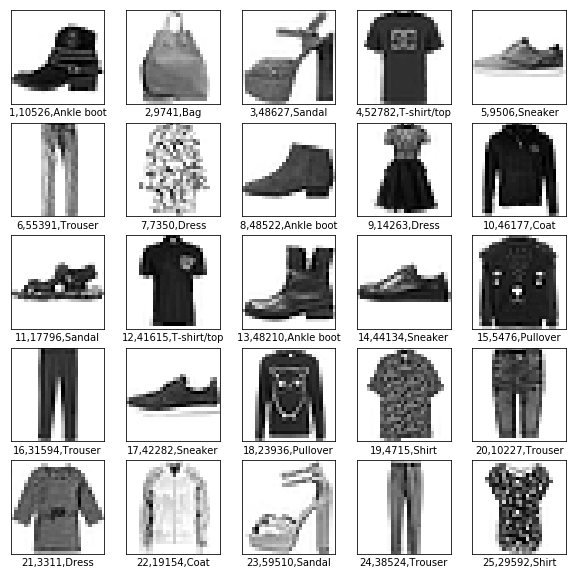

In [42]:
train_images = train_images / 255.0

test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    n=random.randint(0,60000-1)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[n], cmap=plt.cm.binary)
    txt=str(i+1)+","+str(n)+","+str(class_names[train_labels[n]])
    plt.xlabel(txt)
    '''
    txt=str(i)+","+str(n)+","+str(class_names[train_labels[n]])
    plt.text(txt)
    '''
plt.show()

In [43]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

网络中的第一层, tf.keras.layers.Flatten, 将图像格式从一个二维数组(包含着28x28个像素)转换成为一个包含着28 * 28 = 784个像素的一维数组。可以将这个网络层视为它将图像中未堆叠的像素排列在一起。这个网络层没有需要学习的参数;它仅仅对数据进行格式化。

在像素被展平之后，网络由一个包含有两个tf.keras.layers.Dense网络层的序列组成。他们被称作全连接层。 第一个Dense网络层包含有128个节点(或被称为神经元)。第二个(也是最后一个)网络层是一个包含10个节点的softmax层—它将返回包含10个概率分数的数组，总和为1。每个节点包含一个分数，表示当前图像属于10个类别之一的概率。

In [44]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 11s 187us/step - loss: 0.4978 - acc: 0.8253
Epoch 2/5
60000/60000 [==============================] - 10s 174us/step - loss: 0.3745 - acc: 0.8654
Epoch 3/5
60000/60000 [==============================] - 11s 184us/step - loss: 0.3374 - acc: 0.8777
Epoch 4/5
60000/60000 [==============================] - 11s 178us/step - loss: 0.3121 - acc: 0.8859
Epoch 5/5
60000/60000 [==============================] - 11s 185us/step - loss: 0.2949 - acc: 0.8926


In [48]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 70us/step
Test accuracy: 0.8752


## 6、更强的深度学习

